In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Context

In [2]:
df = pd.read_csv("train.csv", index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


# Data quality assessment

In [3]:
# Get the overall description of the df: rows, columns, data types, count of non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


<AxesSubplot:ylabel='PassengerId'>

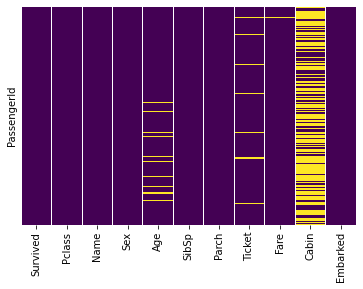

In [4]:
# Visualization of missing values distribution
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Columns with missing values: Age, Fare, Embarked, Cabin, Ticket. Cabin column contains ~70% of Null values.
Data types are correct.

In [5]:
# Check on full duplicates (excluding generated PassengerId)
dupl = df[["Survived", "Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Cabin", "Fare", "Embarked"]].duplicated(keep=False).reset_index().rename(columns={0:'duplicate'})
dupl[dupl["duplicate"]==True]["duplicate"].count()

0

In [6]:
# Columns are supposed to be useless for data analysis 
# Cabin - the majority of values are NaN
# Ticket - technical values without business sense
# Name - PII data without any value for data analysis
useless_columns = ["Name", "Ticket", "Cabin"] 
df = df.drop(columns=useless_columns) # Drop useless columns from the df to improve performance while df processing
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
0,1,1,male,NaN,2,0,27.14,S
1,0,3,male,NaN,0,0,13.35,S
2,0,3,male,0.33,1,2,71.29,S
3,0,3,male,19.00,0,0,13.04,S
4,1,3,male,25.00,0,0,7.76,S


In [7]:
# Get an overall summary of the dataset using descriptive statistics of numeric attributes
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [8]:
# Get an overall summary of the dataset using descriptive statistics of non-numeric attributes
df.describe(include='object')

,Sex,Embarked
count,100000,99750
unique,2,3
top,male,S
freq,56114,72139


Value range for each column looks meaningful and correct based on min, max and mean values (numeric attributes) and unique values (non-numeric attributes).

In [9]:
# Check for unique values per column
val_counts_dict = {}
for column in df.columns:
    val_counts_dict[column] = df[column].value_counts().to_dict()
val_counts_dict

{'Survived': {0: 57226, 1: 42774},
 'Pclass': {3: 41006, 1: 30315, 2: 28679},
 'Sex': {'male': 56114, 'female': 43886},
 'Age': {25.0: 2354,
  23.0: 2345,
  26.0: 2320,
  24.0: 2298,
  27.0: 2088,
  22.0: 2019,
  52.0: 1924,
  28.0: 1911,
  53.0: 1905,
  55.0: 1840,
  51.0: 1836,
  56.0: 1825,
  54.0: 1819,
  57.0: 1803,
  29.0: 1769,
  49.0: 1748,
  50.0: 1740,
  58.0: 1712,
  48.0: 1701,
  21.0: 1675,
  30.0: 1661,
  34.0: 1649,
  31.0: 1631,
  59.0: 1620,
  47.0: 1616,
  46.0: 1610,
  36.0: 1608,
  32.0: 1574,
  60.0: 1550,
  38.0: 1547,
  33.0: 1529,
  35.0: 1528,
  45.0: 1525,
  40.0: 1522,
  37.0: 1504,
  41.0: 1497,
  61.0: 1496,
  39.0: 1479,
  43.0: 1478,
  44.0: 1477,
  42.0: 1425,
  20.0: 1387,
  62.0: 1361,
  63.0: 1253,
  64.0: 1102,
  65.0: 1069,
  4.0: 1012,
  5.0: 1008,
  6.0: 970,
  19.0: 970,
  66.0: 942,
  7.0: 941,
  3.0: 925,
  2.0: 879,
  8.0: 816,
  67.0: 768,
  9.0: 730,
  18.0: 716,
  68.0: 678,
  1.0: 649,
  10.0: 602,
  69.0: 561,
  11.0: 517,
  70.0: 465,
  

In [10]:
# Fill Null values
# Age - replace NULLs with mean value
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fare - replace NULLs with mean value depending on the passenger's class
cond1 = (df['Pclass'] == 1)
cond2 = (df['Pclass'] == 2)
cond3 = (df['Pclass'] == 3)
df.loc[cond1,'Fare'] = df.loc[cond1,'Fare'].fillna(df.loc[cond1,'Fare'].mean())
df.loc[cond2,'Fare'] = df.loc[cond2,'Fare'].fillna(df.loc[cond2,'Fare'].mean())
df.loc[cond3,'Fare'] = df.loc[cond3,'Fare'].fillna(df.loc[cond3,'Fare'].mean())

# Embarked - replace NULLs with mode value (the most frequent)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Data exploration

<AxesSubplot:xlabel='Survived', ylabel='count'>

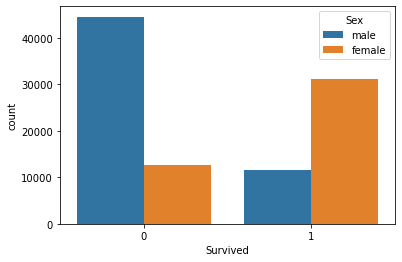

In [11]:
# Count number of survived by passengers' gender
sns.countplot(x='Survived', hue='Sex', data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

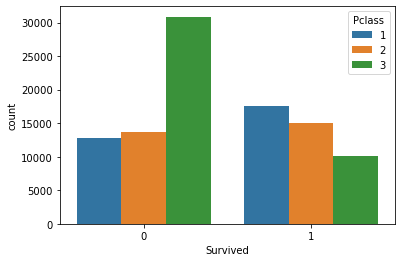

In [12]:
# Count number of survived by passengers' class
sns.countplot(x='Survived', hue='Pclass', data=df)

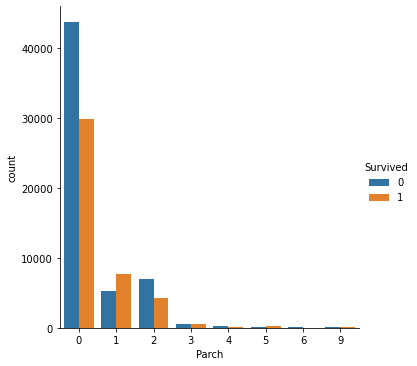

In [13]:
# Count number of survived by passengers' parent-child feature
sns.catplot(x='Parch', data=df, hue='Survived', kind='count')

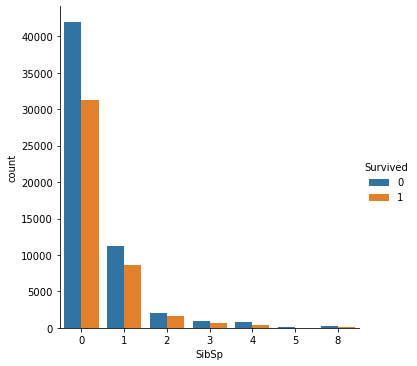

In [14]:
# Count number of survived by passengers' sibling-spouse feature
sns.catplot(x='SibSp', data=df, hue='Survived', kind='count')

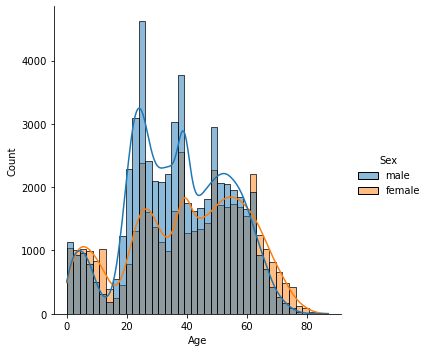

In [15]:
# Get passenger distribution by age and gender
sns.displot(df, x="Age", hue="Sex", kde=True, bins=40)

Text(0.5, 0, 'Fare, $')

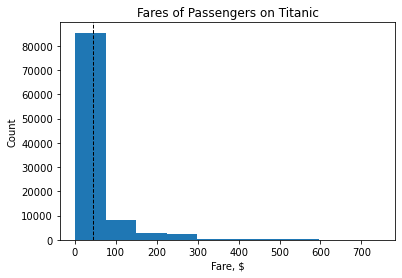

In [16]:
# Distribution of passengers by fares
plt.hist(df["Fare"])
plt.axvline(df["Fare"].mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Fares of Passengers on Titanic')
plt.ylabel('Count')
plt.xlabel('Fare, $')

In [17]:
# Turn text variable to numeric to find correlation
corr_df = df.copy() # Make a copy of df to build correlation

# Gender
gender = {"male": 1, "female": 0}
corr_df['Sex'] = corr_df['Sex'].map(gender)

<AxesSubplot:>

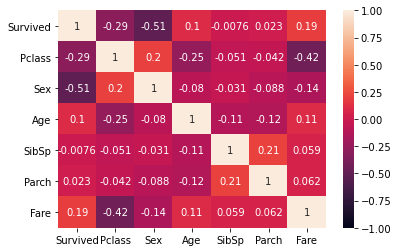

In [18]:
# Correlation between df attributes
sns.heatmap(corr_df.corr(), annot=True, vmin=-1, vmax=1)

### Calculate survival rate

In [19]:
# Children survival rate
# Children age is supposed to be less than 18 y.o.
children = df[df['Age'] < 18]
children_survived = df[(df['Age'] < 18) & (df['Survived'] == 1)]
children_survival_rate = children_survived.shape[0] / children.shape[0]
format(children_survival_rate, ".0%")

'44%'

In [20]:
# Women survival rate
women = df[(df['Sex'] == 'female') & (df['Age'] > 18)]
women_survived = df[(df['Sex'] == 'female') & (df['Age'] > 18) & (df['Survived'] == 1)]
women_survival_rate = women_survived.shape[0] / women.shape[0]
format(women_survival_rate, ".0%")

'73%'

In [21]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
0,1,1,male,39.00,2,0,27.14,S
1,0,3,male,39.00,0,0,13.35,S
2,0,3,male,0.33,1,2,71.29,S
3,0,3,male,19.00,0,0,13.04,S
4,1,3,male,25.00,0,0,7.76,S


In [22]:
# Men survival rate
men = df[(df['Sex'] == 'male') & (df['Age'] > 18)]
men_survived = df[(df['Sex'] == 'male') & (df['Age'] > 18) & (df['Survived'] == 1)]
men_survival_rate = men_survived.shape[0] / men.shape[0]
format(men_survival_rate, ".0%")

'21%'

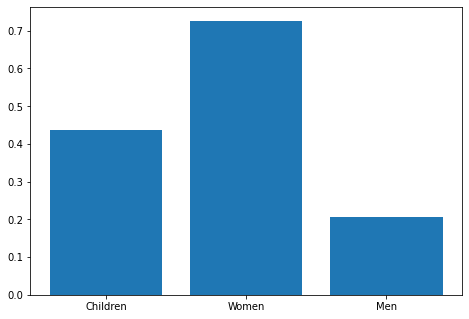

In [23]:
# Visualize the results
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
x_axis = ["Children", "Women", "Men"]
data = [children_survival_rate, women_survival_rate, men_survival_rate]
ax.bar(x_axis, data)
plt.show()

The probability of children survival is 41%, women - 73%, men - 21%. Chance of child and woman survival is higher that man's for obvious reason - women and children are evacuated first.

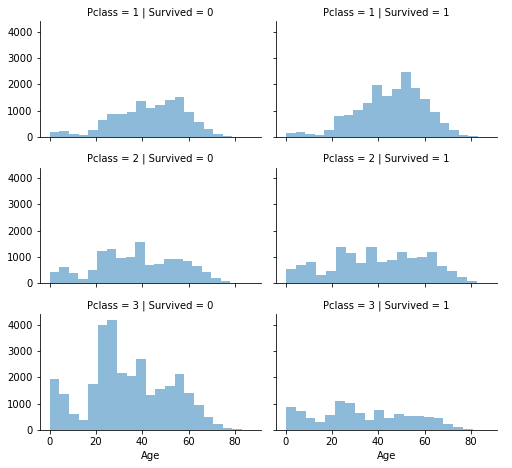

In [24]:
# Chance of survival depending on the passenger's class
grid = sns.FacetGrid(df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

According to the visualization above, passengers of the first class had more survival chances than passengers of lower class. One more assumption - passengers from the 3rd class had low probability to survive.

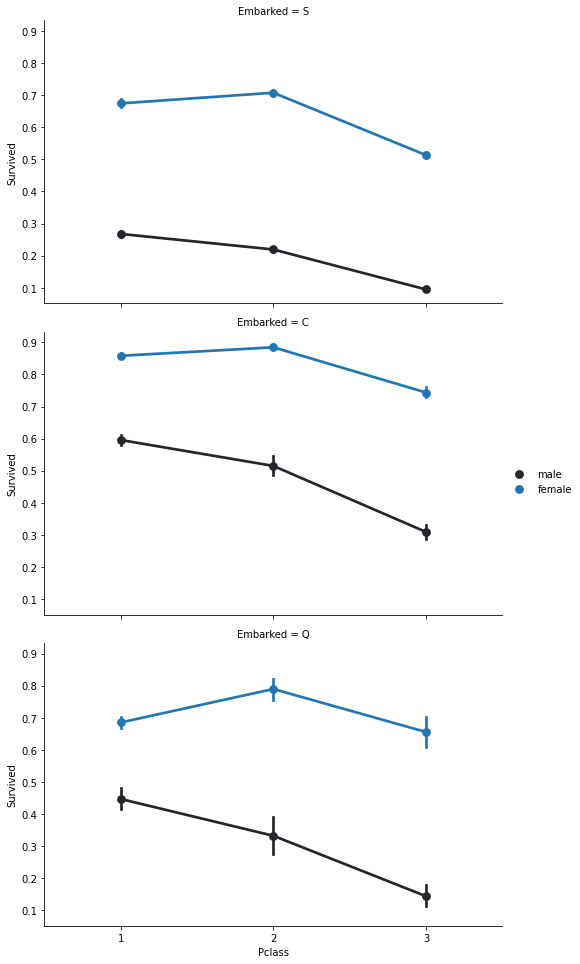

In [25]:
# Survival analysis based on embarked, gender and passenger's class parameters
faced_grid = sns.FacetGrid(df, row='Embarked', height=4.5, aspect=1.6)
faced_grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
faced_grid.add_legend()

Based on the results of faced grid visualization, it's possible to notice that embarked attribute seemed not to be correlated with survival status of passengers.

E:\Anaconda\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


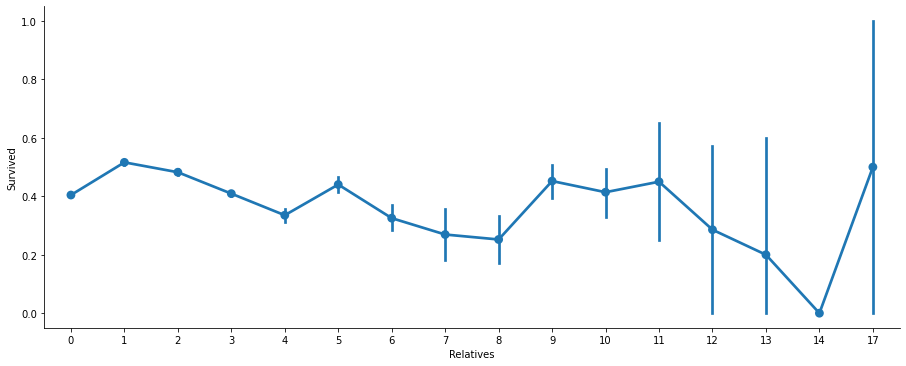

In [26]:
# Analysis of SibSp & Parch attributes correlation with survival rate
# Make a new attribute that contains info about passenger's relatives count onboard
df['Relatives'] = df['SibSp'] + df['Parch']

# Visualize the result
axes = sns.factorplot('Relatives','Survived', 
                      data=df, aspect = 2.5, )

The probability of survival is higher for passengers with 1-2 or 9-11 or 17 relatives.

# Summary

During data quality check of the source dataset the following tasks were done:
- Analyzed the dataset structure (data size, columns, data types)
- Explored columns' values (missing values, statistics, unique values, etc.)
- Full duplicates search
- Replaced NULL values with relevant data based on buiness sense of the dataset

According to the general data observartion, the following summary could be made:
- Gender, passenger's class, age group (child/adult) are mostly supposed to be correlated with passenger's survival
- Chance of child and woman survival is higher that man's
- The probability of survival of the 3rd class passengers is low
- Passengers of the 1st class are assumed to have higher survival rate that passengers of the 2nd and the 3rd classes
- Port (embarked attribute) has no impact on survival rate of Titanic's passengers
- Passengers who were onboard not alone and, more interesting, with 1-2, 9-11 or 17 relatives had higher survival rate.